In [67]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pyranges

from zhunt_wrapper import alanrun


In [23]:
# Plots stuff
sns.set()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Run ZHunt

In [30]:
sequences_df = pd.read_csv('summary.csv')
sequences_df['date'] = pd.to_datetime(sequences_df['date'])
sequences_df

,accession,strain,date,acc_date
0,MW883202.1,epsilon,2020-10-15,y
1,MW453103.1,zeta,2020-12-24,y
2,MW560924.1,eta,2021-01-17,y
3,MZ681419.1,iota,2020-12-11,y
4,MW598419.1,beta,2021-01-14,y
5,MZ275289.1,lambda,2021-01-30,y
6,MZ555270.1,theta,2021-06-22,y
7,MZ169911.1,gamma,2021-02-19,y
8,OD920331.1,alpha,2020-12-11,y
9,MZ359841.1,delta,2021-04-22,y


In [9]:
z_hunt_results = {}
for strain_name in sequences_df['strain']:
    with open(f'fasta/{strain_name}.fasta', 'r') as tmp_fasta:
        z_hunt_results[strain_name] = alanrun(''.join(tmp_fasta.readlines()[1:]).replace('\n', ''),)

dinucleotides 8
min/max 6 8
min/max 6 8
operating on /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpgs8yav_d
calculating zscore
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpgs8yav_d
inputting sequence
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpgs8yav_d.Z-SCORE

 run time=0 sec
use min/max 6 8
analyzing_zscore
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpgs8yav_d.Z-SCORE
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpgs8yav_d
inputting sequence
dinucleotides 8
min/max 6 8
min/max 6 8
operating on /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpo2oz18qc
calculating zscore
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpo2oz18qc
inputting sequence
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpo2oz18qc.Z-SCORE

 run time=1 sec
use min/max 6 8
analyzing_zscore
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpo2oz18qc.Z-SCORE
opening /var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/tmpo2

In [31]:
z_hunt_results['reference']

,Start,End,nu-1,nu-2,nu-3,Z-Score,Sequence,Conformation
0,1,17,16,32.059,26.188,0.188233,attaaaggtttatacc,ASASASASASASASAS
1,2,18,16,30.200,28.375,0.420383,ttaaaggtttatacct,SASASASASASASASA
2,3,17,14,31.703,27.287,0.225544,taaaggtttatacc,ASASASASASASAS
3,4,18,14,29.878,30.366,0.467151,aaaggtttatacct,SASASASASASASA
4,5,17,12,31.481,28.602,0.250816,aaggtttatacc,ASASASASASAS
...,...,...,...,...,...,...,...,...
29898,29899,29913,14,34.855,9.251,0.027928,aaaaaattaaaggt,SASASASASASASA
29899,29900,29916,16,35.148,20.032,0.021698,aaaaattaaaggttta,ASASASASASASASAS
29900,29901,29917,16,33.649,15.281,0.070950,aaaattaaaggtttat,SASASASASASASASA
29901,29902,29918,16,33.586,24.518,0.074107,aaattaaaggtttata,ASASASASASASASAS


In [72]:
tmp_df = z_hunt_results['reference'].copy()
tmp_df['Chromosome'] = 0

pyranges.PyRanges(tmp_df)

,Start,End,nu-1,nu-2,nu-3,Z-Score,Sequence,Conformation,Chromosome
0,1,17,16,32.059,26.188,0.188233,attaaaggtttatacc,ASASASASASASASAS,0
1,2,18,16,30.200,28.375,0.420383,ttaaaggtttatacct,SASASASASASASASA,0
2,3,17,14,31.703,27.287,0.225544,taaaggtttatacc,ASASASASASASAS,0
3,4,18,14,29.878,30.366,0.467151,aaaggtttatacct,SASASASASASASA,0
4,5,17,12,31.481,28.602,0.250816,aaggtttatacc,ASASASASASAS,0
...,...,...,...,...,...,...,...,...,...
29898,29899,29913,14,34.855,9.251,0.027928,aaaaaattaaaggt,SASASASASASASA,0
29899,29900,29916,16,35.148,20.032,0.021698,aaaaattaaaggttta,ASASASASASASASAS,0
29900,29901,29917,16,33.649,15.281,0.070950,aaaattaaaggtttat,SASASASASASASASA,0
29901,29902,29918,16,33.586,24.518,0.074107,aaattaaaggtttata,ASASASASASASASAS,0


In [32]:
analysis_df = sequences_df.copy()
analysis_df['mean_zscore'] = analysis_df['strain'].map(lambda strain: z_hunt_results[strain]['Z-Score'].mean())
analysis_df['median_zscore'] = analysis_df['strain'].map(lambda strain: z_hunt_results[strain]['Z-Score'].median())

In [33]:
analysis_df

,accession,strain,date,acc_date,mean_zscore,median_zscore
0,MW883202.1,epsilon,2020-10-15,y,6.098604,0.385565
1,MW453103.1,zeta,2020-12-24,y,6.077690,0.383550
2,MW560924.1,eta,2021-01-17,y,6.087384,0.384879
3,MZ681419.1,iota,2020-12-11,y,6.105467,0.384793
4,MW598419.1,beta,2021-01-14,y,6.049067,0.383421
5,MZ275289.1,lambda,2021-01-30,y,6.097063,0.385307
6,MZ555270.1,theta,2021-06-22,y,6.118544,0.384407
7,MZ169911.1,gamma,2021-02-19,y,6.081765,0.385136
8,OD920331.1,alpha,2020-12-11,y,6.121260,0.384621
9,MZ359841.1,delta,2021-04-22,y,6.100821,0.384793


In [34]:
analysis_df.dtypes

accession                object
strain                   object
date             datetime64[ns]
acc_date                 object
mean_zscore             float64
median_zscore           float64
dtype: object

# Plot Mean & Median scores

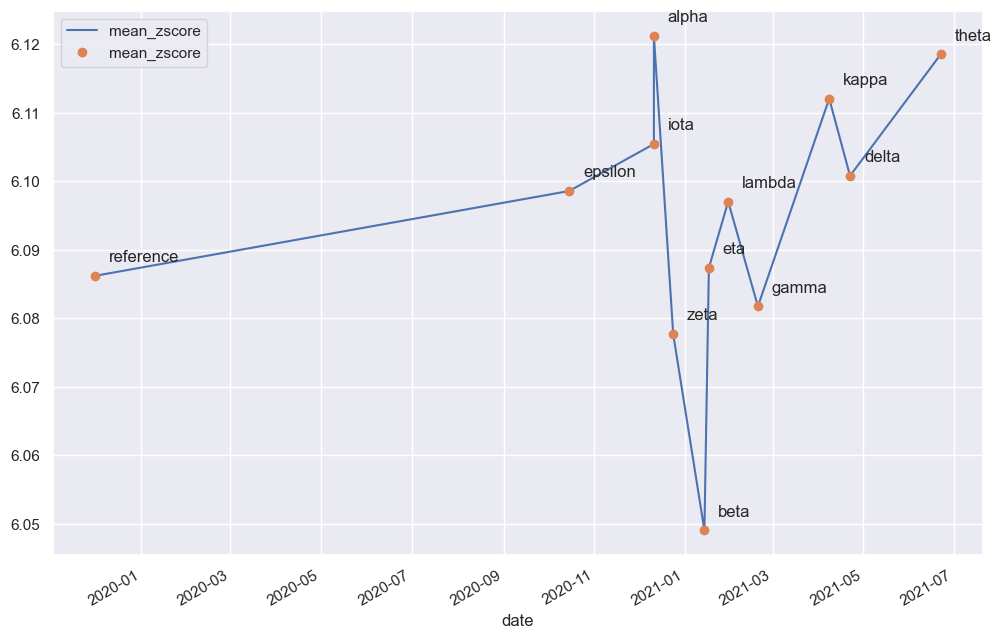

In [53]:
METRIC = 'mean_zscore'

ax = analysis_df.plot(x='date', y=METRIC,)
analysis_df.plot(ax=ax, x='date', y=METRIC, style='o')
for index, (_, row) in enumerate(analysis_df.iterrows()):
    ax.annotate(row.strain, (row.date, row[METRIC]), xytext=(10,10), textcoords='offset points')

plt.show()

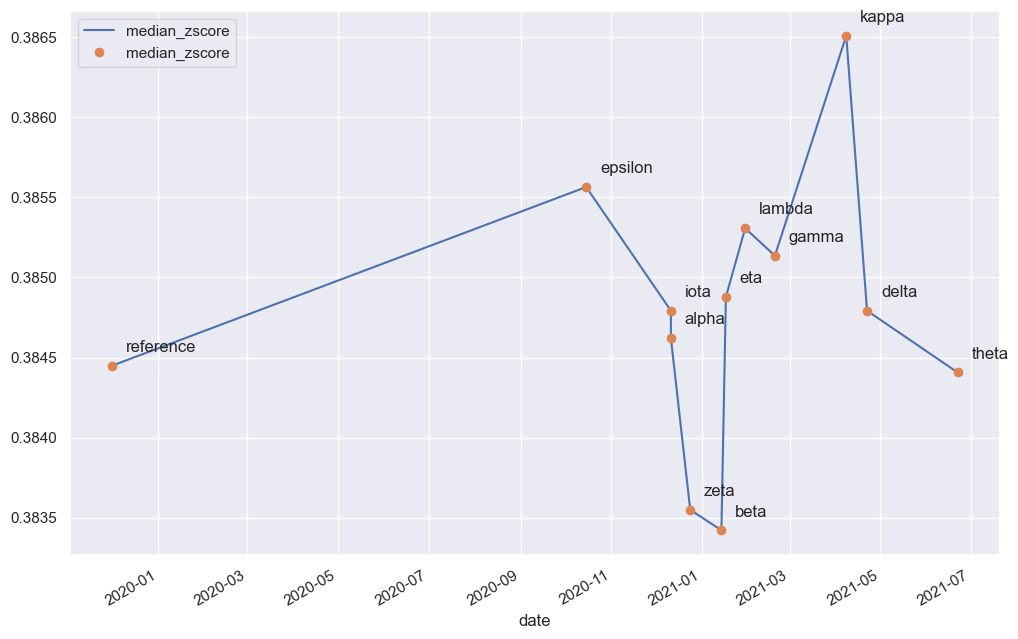

In [54]:
METRIC = 'median_zscore'

ax = analysis_df.plot(x='date', y=METRIC,)
analysis_df.plot(ax=ax, x='date', y=METRIC, style='o')
for index, (_, row) in enumerate(analysis_df.iterrows()):
    ax.annotate(row.strain, (row.date, row[METRIC]), xytext=(10,10), textcoords='offset points')

plt.show()

# Split Zscores by bins:

In [61]:
def get_bins_borders(bin_size, seq_size):
    return np.arange(0, seq_size + bin_size - 1, bin_size / 2, dtype=int,)  # Include right border

In [73]:
bin_borders_r = get_bins_borders(100, 31000)
bin_ranges = list(zip(bin_borders_r[:-2], bin_borders_r[2:]))
def process_sequence_zscores(strain, zscores_df):
    bins_stats = []
    
    tmp_df = zscores_df.copy()
    tmp_df['Chromosome'] = 0
    ranges = pyranges.PyRanges(tmp_df)
    
    for range_ in bin_ranges:
        intersections_df = ranges.intersect(
            pyranges.PyRanges(
                starts=[range_[0]], ends=[range_[1]], chromosomes=[0]
            )  # Chromosomes param added as a workaround for non-chromosome data
        ).df
        if intersections_df.empty:
            bins_stats.append(
                dict(
                    strain=strain,
                    Start=range_[0],
                    End=range_[1],
                    mean=0,
                    median=0,
                    count=0,
                    scores_sum=0,
                )
            )
            continue
        bins_stats.append(
            dict(
                strain=strain,
                Start=range_[0],
                End=range_[1],
                mean=intersections_df['Z-Score'].mean(),
                median=intersections_df['Z-Score'].median(),
                count=intersections_df.shape[0],
                scores_sum=intersections_df['Z-Score'].sum(),
            )
        )
    result_df = pd.DataFrame(bins_stats)
    return result_df
    

In [77]:

bins_stats = []
for strain, zscore_df in z_hunt_results.items():
    bins_stats.append(process_sequence_zscores(strain, zscore_df))
res_df = pd.concat(bins_stats)
res_df


,strain,Start,End,mean,median,count,scores_sum
0,epsilon,0,100,15.439588,2.968799,99,1528.519235
1,epsilon,50,150,15.002325,4.029092,114,1710.265093
2,epsilon,100,200,6.542734,4.060970,111,726.243433
3,epsilon,150,250,9.462233,3.452443,114,1078.694541
4,epsilon,200,300,24.968365,3.179330,111,2771.488494
...,...,...,...,...,...,...,...
615,reference,30750,30850,0.000000,0.000000,0,0.000000
616,reference,30800,30900,0.000000,0.000000,0,0.000000
617,reference,30850,30950,0.000000,0.000000,0,0.000000
618,reference,30900,31000,0.000000,0.000000,0,0.000000


/var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/ipykernel_49456/786934499.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


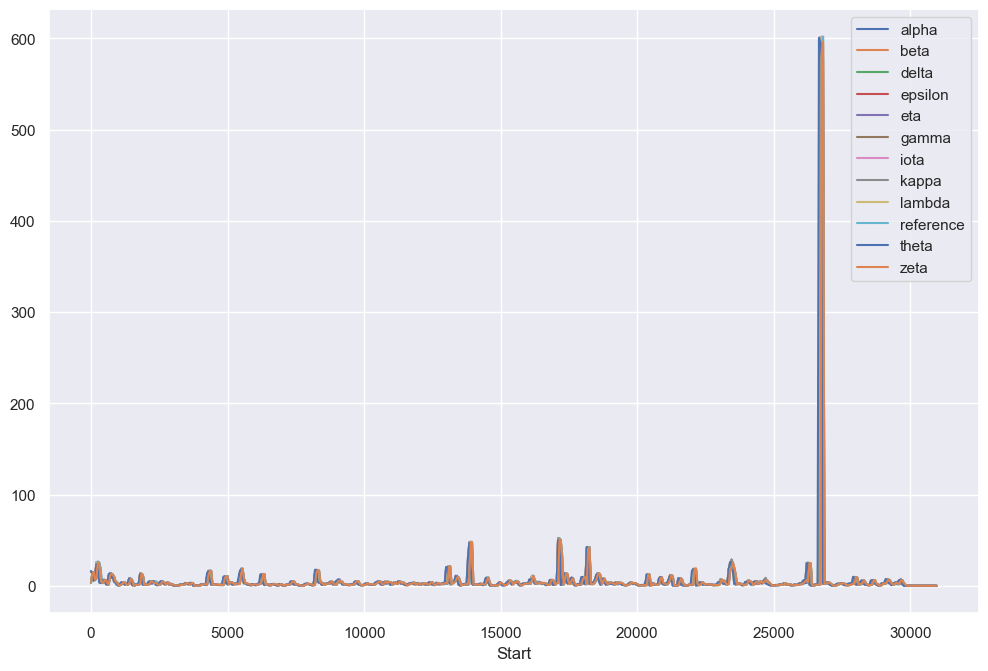

In [82]:


METRIC = 'mean'
fig, ax = plt.subplots()

for name, group in res_df.groupby('strain'):
    group.plot(ax=ax, x='Start', y=METRIC, label=name)

fig.show()

/var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/ipykernel_49456/1290855931.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


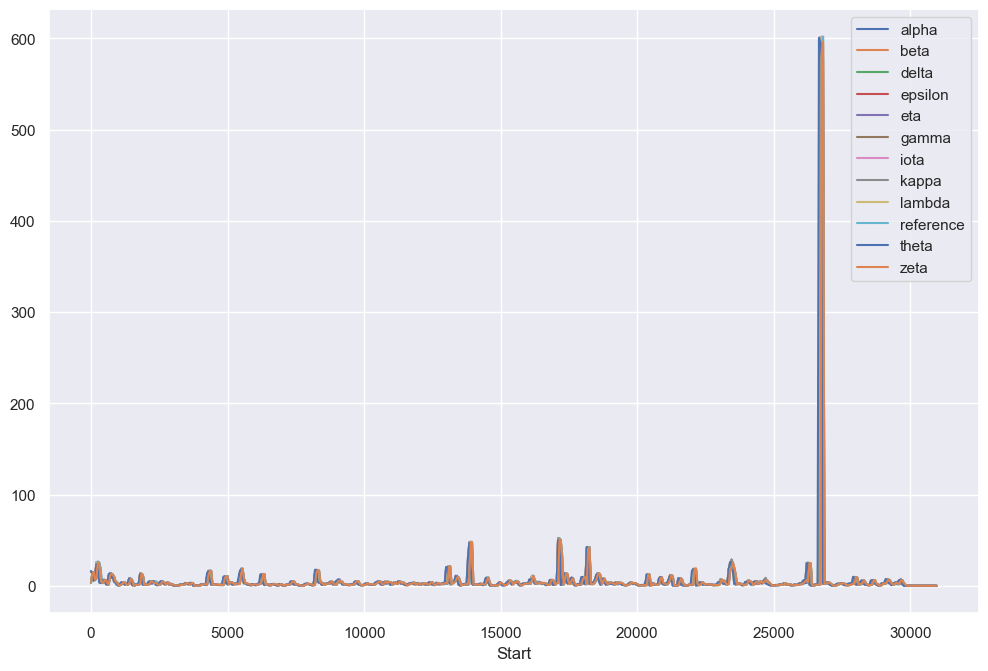

In [83]:
METRIC = 'median'

fig, ax = plt.subplots()

for name, group in res_df.groupby('strain'):
    group.plot(ax=ax, x='Start', y='mean', label=name)

fig.show()

/var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/ipykernel_49456/1826667606.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


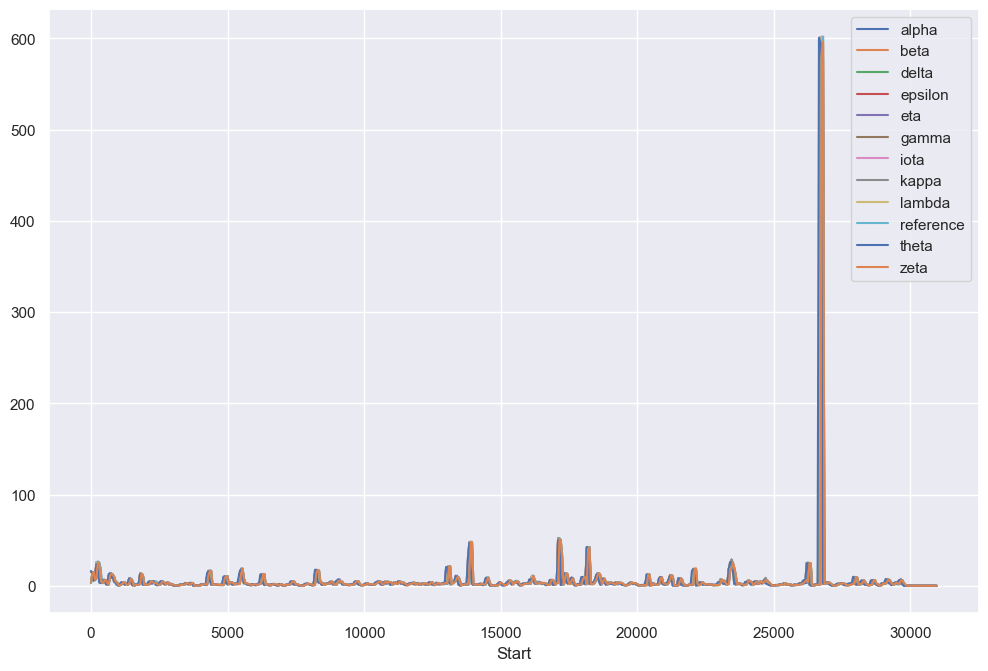

In [84]:
METRIC = 'scores_sum'

fig, ax = plt.subplots()

for name, group in res_df.groupby('strain'):
    group.plot(ax=ax, x='Start', y='mean', label=name)

fig.show()

/var/folders/92/ml61nt355nb1nv82hmrrmz300000gn/T/ipykernel_49456/4239048720.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


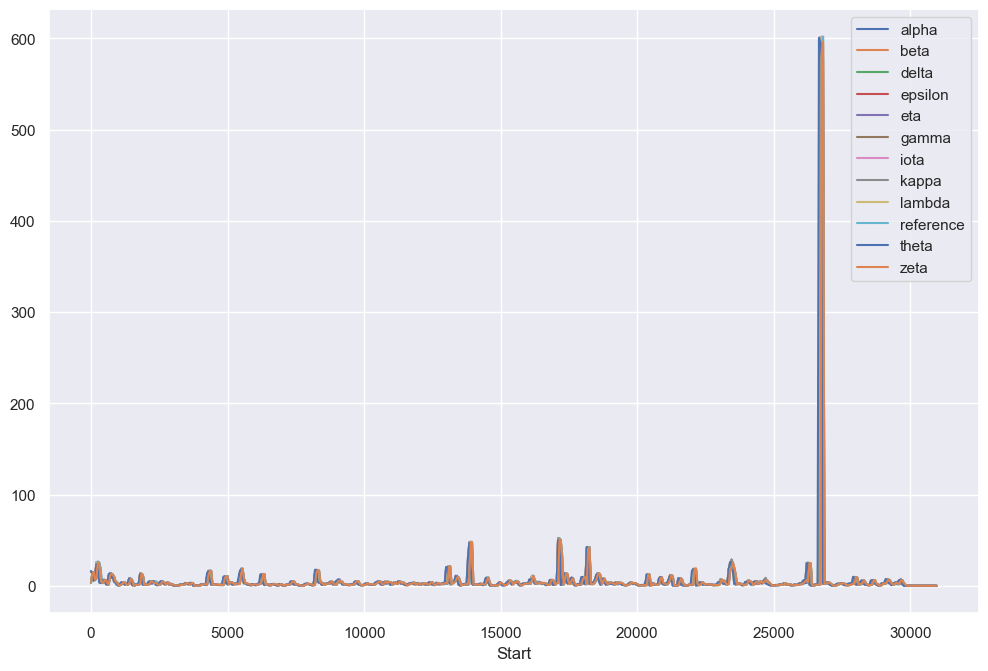

In [85]:
METRIC = 'count'

fig, ax = plt.subplots()

for name, group in res_df.groupby('strain'):
    group.plot(ax=ax, x='Start', y='mean', label=name)

fig.show()